<a href="https://colab.research.google.com/github/chouchouyu/PINN-slove-PDE/blob/main/cqf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
! git clone https://github.com/chouchouyu/PINN-slove-PDE.git

Cloning into 'PINN-slove-PDE'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 223 (delta 80), reused 179 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (223/223), 25.21 MiB | 36.36 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [15]:
import os
# current_working_dir = os.getcwd()
# print(f"   {current_working_dir}")
# path="/content/drive/My Drive/Colab Notebooks/fbsde_env"
path="/content/drive/MyDrive/Colab Notebooks/fbsde_env"
os.chdir(path=path)
files =os.listdir(path=path)
for name in files:
  print(name)
!python cqf_FBSNNs.py
!python cqf_utils.py
!python cqf_CallOption.py

cqf_Models.py
cqf_CallOption.py
cqf_utils.py
cqf_vanilla_call.py
cqf_FBSNNs.py
cqf_0_vanilla_call.py
cqf_0_Models.py
cqf_0_FBSNNs.py
cqf_0_CallOption.py
Python版本: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch版本: 2.9.0+cu126
Python版本: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch版本: 2.9.0+cu126
Python版本: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch版本: 2.9.0+cu126


Python版本: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch版本: 2.9.0+cu126
检测到PyTorch版本: 2.9.0+cu126
检测到 1 个CUDA设备
  GPU 0: Tesla T4 (15.83 GB)
✓ 使用CUDA设备: cuda:0 - Tesla T4
cuda:0
It: 0, Loss: 2.243e-01, Y0: 0.564, Time: 1.14, Learning Rate: 1.000e-03
It: 100, Loss: 8.067e-02, Y0: 0.177, Time: 3.32, Learning Rate: 1.000e-03
It: 200, Loss: 8.933e-01, Y0: 0.408, Time: 2.96, Learning Rate: 1.000e-03
It: 300, Loss: 5.551e-02, Y0: -0.024, Time: 2.96, Learning Rate: 1.000e-03
It: 400, Loss: 3.683e-02, Y0: 0.080, Time: 3.30, Learning Rate: 1.000e-03
It: 500, Loss: 3.471e-01, Y0: 0.129, Time: 3.32, Learning Rate: 1.000e-03
It: 600, Loss: 6.006e-02, Y0: 0.135, Time: 2.97, Learning Rate: 1.000e-03
It: 700, Loss: 1.462e-01, Y0: 0.038, Time: 2.94, Learning Rate: 1.000e-03
It: 800, Loss: 4.861e-01, Y0: 0.076, Time: 3.19, Learning Rate: 1.000e-03
It: 900, Loss: 2.013e-01, Y0: 0.037, Time: 3.72, Learning Rate: 1.000e-03
It: 1000, Loss: 5.419e-01, Y0: 0.192, Time: 2.95, Learning Rate: 1.000e

/tmp/ipython-input-86294085.py:101: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  option_prices[i, j], deltas[i, j] = black_scholes_call(S, K, time_to_maturity, r, sigma, q)


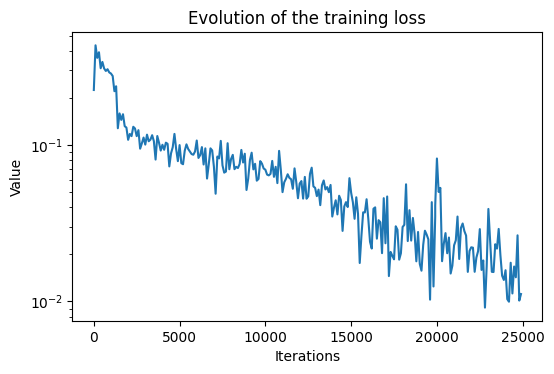

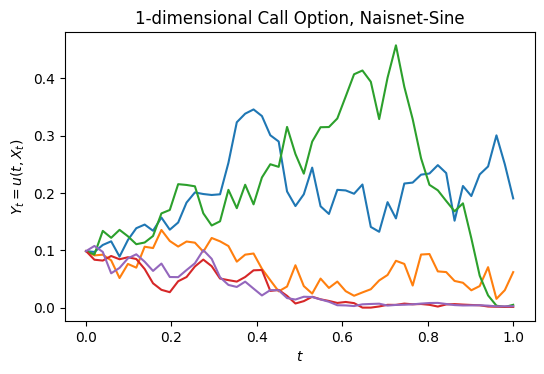

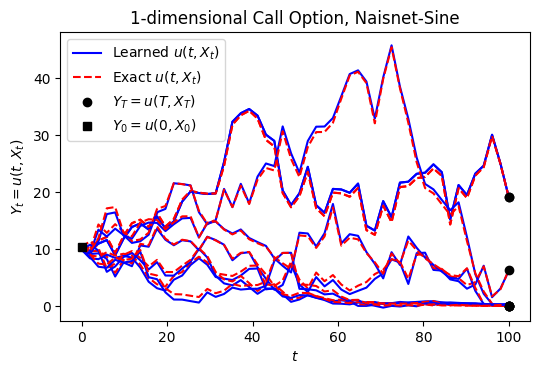

In [16]:
import sys
import os

# sys.path.append(os.path.abspath("PINN-slove-PDE/"))
# sys.path.append(os.path.abspath("models/"))
#%%
from cqf_utils import set_seed
from cqf_FBSNNs import *
from cqf_CallOption import *
#%%
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 1 # 轨迹数量（批量大小） number of trajectories (batch size)
N = 50  #  时间快照数量 number of time snapshots
D = 1 # 维度数 number of dimensions
Mm = N ** (1/5) # 计算Mm为N的1/5次方

layers = [D + 1] + 4 * [256] + [1] #  定义神经网络层结构

Xi = np.array([1.0] * D)[None, :]  # 创建初始条件数组
T = 1.0 # 设置时间参数

"Available architectures"
mode = "Naisnet"  #  可用选项：FC 和 Naisnet  | FC and Naisnet are available
activation = "Sine"  # 激活函数：Sine、ReLU 和 Tanh | Sine, ReLU and Tanh are available
model = CallOption(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10 ** 4 # 训练迭代次数
lr = 1e-3 # 学习率
#%%
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")
#%%
# model.load_model("models/CallOption4-256XVAPaper.pth")
#%%
n_iter = 51 * 10 ** 2
lr = 1e-5
#%%
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")
#%%

set_seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(15):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    if type(t_test_i).__module__ != 'numpy':
        t_test_i = t_test_i.cpu().numpy()
    t_test = np.concatenate((t_test, t_test_i), axis=0)
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)
X_pred = X_pred[:500, :]
# %%
from scipy.stats import multivariate_normal as normal

# %%
X_preds = X_pred[:, :, 0]


# %%
def black_scholes_call(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * np.exp(-q * T) * normal.cdf(d1)) - (K * np.exp(-r * T) * normal.cdf(d2))
    delta = normal.cdf(d1)
    return call_price, delta


def calculate_option_prices(X_pred, time_array, K, r, sigma, T, q=0):
    rows, cols = X_pred.shape
    option_prices = np.zeros((rows, cols))
    deltas = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            S = X_pred[i, j]
            t = time_array[j]
            time_to_maturity = T - t
            if time_to_maturity > 0:
                option_prices[i, j], deltas[i, j] = black_scholes_call(S, K, time_to_maturity, r, sigma, q)
            else:
                option_prices[i, j] = max(S - K, 0)
                if S > K:
                    deltas[i, j] = 1
                elif S == K:
                    deltas[i, j] = 0.5
                else:
                    deltas[i, j] = 0

    return option_prices, deltas


# Given parameters
K = 1.0  # Strike price
r = 0.01  # Risk-free interest rate
sigma = 0.25  # Volatility
q = 0  # Dividend yield (assuming none)
T = 1  # Expiry time in years

Y_test, Z_test = calculate_option_prices(X_preds, t_test[0], K, r, sigma, T, q)

errors = (Y_test[:500] - Y_pred[:500,:,0])**2
errors.mean(), errors.std()

np.sqrt(errors.mean())

graph = model.iteration, model.training_loss
#%%
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227
    inches_per_pt = 1.0/72.27
    golden_mean = (np.sqrt(5.0)-1.0)/2.0
    fig_width = fig_width_pt*inches_per_pt*scale
    fig_height = nplots*fig_width*golden_mean
    fig_size = [fig_width,fig_height]
    return fig_size
#%%
plt.figure(figsize=figsize(1.0))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 5
# plt.savefig('Figures/CallOption1DLoss.pdf')
plt.figure(figsize=figsize(1.0))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T)

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Call Option, ' + model.mode + "-" + model.activation)

plt.show()

plt.figure(figsize=figsize(1.0))
plt.plot(t_test[0] * 100, Y_pred[0] * 100, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0] * 100, Y_test[0] * 100, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0, -1] * 100, Y_test[0, -1] * 100, 'ko', label='$Y_T = u(T,X_T)$')
for i in range(7):
    plt.plot(t_test[i] * 100, Y_pred[i] * 100, 'b')
    plt.plot(t_test[i] * 100, Y_test[i] * 100, 'r--')
    plt.plot(t_test[i, -1] * 100, Y_test[i, -1] * 100, 'ko')
plt.plot([0], Y_test[0,0] * 100, 'ks', label='$Y_0 = u(0,X_0)$')
plt.title(str(D) + '-dimensional Call Option, ' + model.mode + "-" + model.activation)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.savefig("CallOption1DPreds.png")
# plt.show()

In [ ]:
Python版本: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch版本: 2.9.0+cu126
检测到PyTorch版本: 2.9.0+cu126
检测到 1 个CUDA设备
  GPU 0: Tesla T4 (15.83 GB)
✓ 使用CUDA设备: cuda:0 - Tesla T4
cuda:0
It: 0, Loss: 2.243e-01, Y0: 0.564, Time: 1.14, Learning Rate: 1.000e-03
It: 100, Loss: 8.067e-02, Y0: 0.177, Time: 3.32, Learning Rate: 1.000e-03
It: 200, Loss: 8.933e-01, Y0: 0.408, Time: 2.96, Learning Rate: 1.000e-03
It: 300, Loss: 5.551e-02, Y0: -0.024, Time: 2.96, Learning Rate: 1.000e-03
It: 400, Loss: 3.683e-02, Y0: 0.080, Time: 3.30, Learning Rate: 1.000e-03
It: 500, Loss: 3.471e-01, Y0: 0.129, Time: 3.32, Learning Rate: 1.000e-03
It: 600, Loss: 6.006e-02, Y0: 0.135, Time: 2.97, Learning Rate: 1.000e-03
It: 700, Loss: 1.462e-01, Y0: 0.038, Time: 2.94, Learning Rate: 1.000e-03
It: 800, Loss: 4.861e-01, Y0: 0.076, Time: 3.19, Learning Rate: 1.000e-03
It: 900, Loss: 2.013e-01, Y0: 0.037, Time: 3.72, Learning Rate: 1.000e-03
It: 1000, Loss: 5.419e-01, Y0: 0.192, Time: 2.95, Learning Rate: 1.000e-03
It: 1100, Loss: 5.046e-01, Y0: 0.212, Time: 2.98, Learning Rate: 1.000e-03
It: 1200, Loss: 8.607e-03, Y0: 0.168, Time: 4.08, Learning Rate: 1.000e-03
It: 1300, Loss: 4.044e-01, Y0: 0.149, Time: 3.26, Learning Rate: 1.000e-03
It: 1400, Loss: 1.122e-01, Y0: 0.095, Time: 2.96, Learning Rate: 1.000e-03
It: 1500, Loss: 2.173e-01, Y0: 0.218, Time: 2.92, Learning Rate: 1.000e-03
It: 1600, Loss: 2.556e-02, Y0: 0.213, Time: 3.19, Learning Rate: 1.000e-03
It: 1700, Loss: 4.743e-01, Y0: 0.141, Time: 3.42, Learning Rate: 1.000e-03
It: 1800, Loss: 2.130e-01, Y0: 0.161, Time: 2.90, Learning Rate: 1.000e-03
It: 1900, Loss: 7.087e-01, Y0: 0.177, Time: 2.96, Learning Rate: 1.000e-03
It: 2000, Loss: 3.744e-02, Y0: 0.134, Time: 3.04, Learning Rate: 1.000e-03
It: 2100, Loss: 8.711e-02, Y0: 0.134, Time: 3.50, Learning Rate: 1.000e-03
It: 2200, Loss: 6.520e-04, Y0: 0.078, Time: 2.91, Learning Rate: 1.000e-03
It: 2300, Loss: 4.904e-02, Y0: 0.135, Time: 2.95, Learning Rate: 1.000e-03
It: 2400, Loss: 8.343e-03, Y0: 0.080, Time: 2.91, Learning Rate: 1.000e-03
It: 2500, Loss: 1.304e-01, Y0: 0.087, Time: 3.64, Learning Rate: 1.000e-03
It: 2600, Loss: 1.137e-01, Y0: 0.209, Time: 2.91, Learning Rate: 1.000e-03
It: 2700, Loss: 8.968e-02, Y0: 0.149, Time: 2.92, Learning Rate: 1.000e-03
It: 2800, Loss: 2.496e-02, Y0: 0.100, Time: 2.96, Learning Rate: 1.000e-03
It: 2900, Loss: 1.690e-01, Y0: 0.036, Time: 3.65, Learning Rate: 1.000e-03
It: 3000, Loss: 6.749e-02, Y0: 0.019, Time: 2.93, Learning Rate: 1.000e-03
It: 3100, Loss: 1.586e-02, Y0: 0.103, Time: 2.92, Learning Rate: 1.000e-03
It: 3200, Loss: 1.368e-02, Y0: 0.064, Time: 2.89, Learning Rate: 1.000e-03
It: 3300, Loss: 1.072e-03, Y0: 0.095, Time: 3.39, Learning Rate: 1.000e-03
It: 3400, Loss: 1.987e-01, Y0: 0.118, Time: 3.21, Learning Rate: 1.000e-03
It: 3500, Loss: 1.751e-01, Y0: 0.105, Time: 2.88, Learning Rate: 1.000e-03
It: 3600, Loss: 3.724e-02, Y0: 0.157, Time: 2.93, Learning Rate: 1.000e-03
It: 3700, Loss: 1.668e-02, Y0: 0.143, Time: 3.22, Learning Rate: 1.000e-03
It: 3800, Loss: 6.206e-02, Y0: 0.094, Time: 3.37, Learning Rate: 1.000e-03
It: 3900, Loss: 2.019e-01, Y0: 0.040, Time: 2.90, Learning Rate: 1.000e-03
It: 4000, Loss: 2.636e-01, Y0: 0.102, Time: 2.92, Learning Rate: 1.000e-03
It: 4100, Loss: 1.603e-01, Y0: 0.089, Time: 4.86, Learning Rate: 1.000e-03
It: 4200, Loss: 1.445e-02, Y0: 0.090, Time: 4.42, Learning Rate: 1.000e-03
It: 4300, Loss: 7.550e-03, Y0: 0.123, Time: 4.28, Learning Rate: 1.000e-03
It: 4400, Loss: 1.711e-02, Y0: 0.084, Time: 5.00, Learning Rate: 1.000e-03
It: 4500, Loss: 6.506e-02, Y0: 0.060, Time: 4.29, Learning Rate: 1.000e-03
It: 4600, Loss: 9.099e-02, Y0: 0.019, Time: 4.27, Learning Rate: 1.000e-03
It: 4700, Loss: 8.911e-02, Y0: 0.187, Time: 5.03, Learning Rate: 1.000e-03
It: 4800, Loss: 5.753e-03, Y0: 0.052, Time: 4.29, Learning Rate: 1.000e-03
It: 4900, Loss: 6.146e-02, Y0: 0.184, Time: 4.28, Learning Rate: 1.000e-03
It: 5000, Loss: 1.785e-02, Y0: 0.084, Time: 5.05, Learning Rate: 1.000e-03
It: 5100, Loss: 1.848e-02, Y0: 0.101, Time: 4.26, Learning Rate: 1.000e-03
It: 5200, Loss: 1.237e-02, Y0: 0.093, Time: 4.48, Learning Rate: 1.000e-03
It: 5300, Loss: 2.499e-01, Y0: 0.056, Time: 4.93, Learning Rate: 1.000e-03
It: 5400, Loss: 2.454e-02, Y0: 0.025, Time: 4.26, Learning Rate: 1.000e-03
It: 5500, Loss: 1.528e-02, Y0: 0.120, Time: 4.57, Learning Rate: 1.000e-03
It: 5600, Loss: 6.888e-02, Y0: 0.064, Time: 4.73, Learning Rate: 1.000e-03
It: 5700, Loss: 6.728e-03, Y0: 0.126, Time: 4.26, Learning Rate: 1.000e-03
It: 5800, Loss: 5.590e-02, Y0: 0.063, Time: 4.66, Learning Rate: 1.000e-03
It: 5900, Loss: 1.626e-01, Y0: 0.096, Time: 4.65, Learning Rate: 1.000e-03
It: 6000, Loss: 1.987e-02, Y0: 0.146, Time: 4.23, Learning Rate: 1.000e-03
It: 6100, Loss: 3.678e-02, Y0: 0.142, Time: 4.86, Learning Rate: 1.000e-03
It: 6200, Loss: 1.513e-01, Y0: 0.170, Time: 4.44, Learning Rate: 1.000e-03
It: 6300, Loss: 4.368e-02, Y0: 0.110, Time: 4.30, Learning Rate: 1.000e-03
It: 6400, Loss: 6.359e-03, Y0: 0.078, Time: 5.04, Learning Rate: 1.000e-03
It: 6500, Loss: 1.043e-02, Y0: 0.092, Time: 4.34, Learning Rate: 1.000e-03
It: 6600, Loss: 7.409e-03, Y0: 0.049, Time: 4.30, Learning Rate: 1.000e-03
It: 6700, Loss: 2.409e-01, Y0: 0.083, Time: 5.08, Learning Rate: 1.000e-03
It: 6800, Loss: 3.940e-02, Y0: 0.088, Time: 4.31, Learning Rate: 1.000e-03
It: 6900, Loss: 1.572e-02, Y0: 0.145, Time: 4.27, Learning Rate: 1.000e-03
It: 7000, Loss: 2.477e-01, Y0: 0.085, Time: 5.10, Learning Rate: 1.000e-03
It: 7100, Loss: 1.992e-01, Y0: 0.088, Time: 4.26, Learning Rate: 1.000e-03
It: 7200, Loss: 1.517e-03, Y0: 0.163, Time: 4.38, Learning Rate: 1.000e-03
It: 7300, Loss: 1.624e-02, Y0: 0.120, Time: 4.91, Learning Rate: 1.000e-03
It: 7400, Loss: 1.930e-01, Y0: 0.051, Time: 4.27, Learning Rate: 1.000e-03
It: 7500, Loss: 5.065e-03, Y0: 0.147, Time: 4.52, Learning Rate: 1.000e-03
It: 7600, Loss: 3.361e-02, Y0: 0.116, Time: 4.85, Learning Rate: 1.000e-03
It: 7700, Loss: 9.580e-02, Y0: 0.174, Time: 4.28, Learning Rate: 1.000e-03
It: 7800, Loss: 1.751e-02, Y0: 0.058, Time: 4.68, Learning Rate: 1.000e-03
It: 7900, Loss: 8.286e-02, Y0: 0.113, Time: 4.60, Learning Rate: 1.000e-03
It: 8000, Loss: 1.538e-02, Y0: 0.108, Time: 4.30, Learning Rate: 1.000e-03
It: 8100, Loss: 1.464e-03, Y0: 0.073, Time: 9.10, Learning Rate: 1.000e-03
It: 8200, Loss: 1.892e-01, Y0: 0.102, Time: 9.13, Learning Rate: 1.000e-03
It: 8300, Loss: 1.982e-01, Y0: 0.126, Time: 8.37, Learning Rate: 1.000e-03
It: 8400, Loss: 3.036e-01, Y0: 0.129, Time: 9.15, Learning Rate: 1.000e-03
It: 8500, Loss: 3.566e-03, Y0: 0.092, Time: 9.15, Learning Rate: 1.000e-03
It: 8600, Loss: 4.162e-03, Y0: 0.137, Time: 8.39, Learning Rate: 1.000e-03
It: 8700, Loss: 3.017e-02, Y0: 0.074, Time: 9.12, Learning Rate: 1.000e-03
It: 8800, Loss: 2.058e-02, Y0: 0.121, Time: 9.10, Learning Rate: 1.000e-03
It: 8900, Loss: 2.503e-03, Y0: 0.053, Time: 8.52, Learning Rate: 1.000e-03
It: 9000, Loss: 1.172e-02, Y0: 0.111, Time: 9.01, Learning Rate: 1.000e-03
It: 9100, Loss: 1.949e-02, Y0: 0.087, Time: 9.11, Learning Rate: 1.000e-03
It: 9200, Loss: 1.031e-02, Y0: 0.083, Time: 8.84, Learning Rate: 1.000e-03
It: 9300, Loss: 3.612e-02, Y0: 0.097, Time: 8.59, Learning Rate: 1.000e-03
It: 9400, Loss: 5.069e-03, Y0: 0.104, Time: 9.11, Learning Rate: 1.000e-03
It: 9500, Loss: 4.824e-02, Y0: 0.112, Time: 9.10, Learning Rate: 1.000e-03
It: 9600, Loss: 4.206e-03, Y0: 0.042, Time: 8.38, Learning Rate: 1.000e-03
It: 9700, Loss: 3.100e-02, Y0: 0.102, Time: 9.14, Learning Rate: 1.000e-03
It: 9800, Loss: 2.750e-01, Y0: 0.121, Time: 9.08, Learning Rate: 1.000e-03
It: 9900, Loss: 1.855e-01, Y0: 0.131, Time: 8.37, Learning Rate: 1.000e-03
It: 10000, Loss: 1.081e-03, Y0: 0.083, Time: 9.08, Learning Rate: 1.000e-03
It: 10100, Loss: 9.931e-01, Y0: 0.094, Time: 9.08, Learning Rate: 1.000e-03
It: 10200, Loss: 1.268e-01, Y0: 0.100, Time: 8.81, Learning Rate: 1.000e-03
It: 10300, Loss: 5.553e-01, Y0: 0.146, Time: 8.74, Learning Rate: 1.000e-03
It: 10400, Loss: 1.043e-01, Y0: 0.121, Time: 9.04, Learning Rate: 1.000e-03
It: 10500, Loss: 2.824e-02, Y0: 0.091, Time: 9.10, Learning Rate: 1.000e-03
It: 10600, Loss: 1.205e-02, Y0: 0.117, Time: 8.44, Learning Rate: 1.000e-03
It: 10700, Loss: 1.396e-02, Y0: 0.102, Time: 9.10, Learning Rate: 1.000e-03
It: 10800, Loss: 7.251e-03, Y0: 0.097, Time: 9.17, Learning Rate: 1.000e-03
It: 10900, Loss: 1.910e-02, Y0: 0.052, Time: 8.35, Learning Rate: 1.000e-03
It: 11000, Loss: 2.999e-02, Y0: 0.064, Time: 9.09, Learning Rate: 1.000e-03
It: 11100, Loss: 1.859e-01, Y0: 0.096, Time: 9.12, Learning Rate: 1.000e-03
It: 11200, Loss: 3.297e-01, Y0: 0.078, Time: 8.64, Learning Rate: 1.000e-03
It: 11300, Loss: 5.509e-03, Y0: 0.096, Time: 8.79, Learning Rate: 1.000e-03
It: 11400, Loss: 4.174e-02, Y0: 0.099, Time: 9.05, Learning Rate: 1.000e-03
It: 11500, Loss: 5.585e-02, Y0: 0.165, Time: 9.44, Learning Rate: 1.000e-03
It: 11600, Loss: 6.117e-03, Y0: 0.119, Time: 8.53, Learning Rate: 1.000e-03
It: 11700, Loss: 5.709e-03, Y0: 0.081, Time: 9.67, Learning Rate: 1.000e-03
It: 11800, Loss: 8.134e-03, Y0: 0.115, Time: 9.43, Learning Rate: 1.000e-03
It: 11900, Loss: 1.073e-02, Y0: 0.128, Time: 8.96, Learning Rate: 1.000e-03
It: 12000, Loss: 1.867e-03, Y0: 0.098, Time: 9.64, Learning Rate: 1.000e-03
It: 12100, Loss: 9.197e-02, Y0: 0.057, Time: 20.23, Learning Rate: 1.000e-03
It: 12200, Loss: 2.327e-02, Y0: 0.102, Time: 18.43, Learning Rate: 1.000e-03
It: 12300, Loss: 1.434e-01, Y0: 0.098, Time: 19.04, Learning Rate: 1.000e-03
It: 12400, Loss: 1.763e-03, Y0: 0.073, Time: 18.09, Learning Rate: 1.000e-03
It: 12500, Loss: 6.035e-02, Y0: 0.112, Time: 18.64, Learning Rate: 1.000e-03
It: 12600, Loss: 9.294e-02, Y0: 0.043, Time: 18.27, Learning Rate: 1.000e-03
It: 12700, Loss: 1.205e-01, Y0: 0.134, Time: 18.21, Learning Rate: 1.000e-03
It: 12800, Loss: 1.523e-03, Y0: 0.107, Time: 18.59, Learning Rate: 1.000e-03
It: 12900, Loss: 4.227e-03, Y0: 0.073, Time: 18.01, Learning Rate: 1.000e-03
It: 13000, Loss: 2.335e-03, Y0: 0.084, Time: 18.94, Learning Rate: 1.000e-03
It: 13100, Loss: 2.450e-01, Y0: 0.085, Time: 18.14, Learning Rate: 1.000e-03
It: 13200, Loss: 2.459e-03, Y0: 0.121, Time: 18.60, Learning Rate: 1.000e-03
It: 13300, Loss: 1.905e-02, Y0: 0.088, Time: 18.30, Learning Rate: 1.000e-03
It: 13400, Loss: 1.845e-01, Y0: 0.092, Time: 17.92, Learning Rate: 1.000e-03
It: 13500, Loss: 6.098e-03, Y0: 0.156, Time: 18.43, Learning Rate: 1.000e-03
It: 13600, Loss: 6.444e-02, Y0: 0.127, Time: 17.73, Learning Rate: 1.000e-03
It: 13700, Loss: 1.121e-01, Y0: 0.100, Time: 18.54, Learning Rate: 1.000e-03
It: 13800, Loss: 1.805e-01, Y0: 0.089, Time: 17.92, Learning Rate: 1.000e-03
It: 13900, Loss: 2.541e-04, Y0: 0.114, Time: 18.15, Learning Rate: 1.000e-03
It: 14000, Loss: 4.518e-02, Y0: 0.085, Time: 18.43, Learning Rate: 1.000e-03
It: 14100, Loss: 2.727e-02, Y0: 0.034, Time: 17.66, Learning Rate: 1.000e-03
It: 14200, Loss: 1.327e-02, Y0: 0.105, Time: 18.47, Learning Rate: 1.000e-03
It: 14300, Loss: 6.155e-02, Y0: 0.042, Time: 17.80, Learning Rate: 1.000e-03
It: 14400, Loss: 1.168e-02, Y0: 0.101, Time: 18.62, Learning Rate: 1.000e-03
It: 14500, Loss: 3.745e-02, Y0: 0.071, Time: 17.90, Learning Rate: 1.000e-03
It: 14600, Loss: 2.671e-01, Y0: 0.087, Time: 18.10, Learning Rate: 1.000e-03
It: 14700, Loss: 1.682e-03, Y0: 0.089, Time: 18.76, Learning Rate: 1.000e-03
It: 14800, Loss: 4.435e-03, Y0: 0.131, Time: 18.29, Learning Rate: 1.000e-03
It: 14900, Loss: 2.455e-02, Y0: 0.117, Time: 18.89, Learning Rate: 1.000e-03
It: 15000, Loss: 2.315e-02, Y0: 0.098, Time: 18.04, Learning Rate: 1.000e-03
It: 15100, Loss: 1.363e-03, Y0: 0.109, Time: 18.82, Learning Rate: 1.000e-03
It: 15200, Loss: 3.542e-03, Y0: 0.109, Time: 18.13, Learning Rate: 1.000e-03
It: 15300, Loss: 9.000e-03, Y0: 0.112, Time: 18.66, Learning Rate: 1.000e-03
It: 15400, Loss: 3.736e-04, Y0: 0.092, Time: 18.30, Learning Rate: 1.000e-03
It: 15500, Loss: 9.709e-04, Y0: 0.108, Time: 18.28, Learning Rate: 1.000e-03
It: 15600, Loss: 3.994e-04, Y0: 0.099, Time: 18.48, Learning Rate: 1.000e-03
It: 15700, Loss: 1.181e-01, Y0: 0.100, Time: 17.71, Learning Rate: 1.000e-03
It: 15800, Loss: 2.082e-03, Y0: 0.074, Time: 18.84, Learning Rate: 1.000e-03
It: 15900, Loss: 6.595e-04, Y0: 0.072, Time: 18.02, Learning Rate: 1.000e-03
It: 16000, Loss: 6.736e-04, Y0: 0.124, Time: 18.96, Learning Rate: 1.000e-03
It: 16100, Loss: 1.485e-04, Y0: 0.102, Time: 40.16, Learning Rate: 1.000e-03
It: 16200, Loss: 2.984e-01, Y0: 0.092, Time: 40.15, Learning Rate: 1.000e-03
It: 16300, Loss: 4.546e-03, Y0: 0.100, Time: 40.58, Learning Rate: 1.000e-03
It: 16400, Loss: 1.786e-03, Y0: 0.110, Time: 40.14, Learning Rate: 1.000e-03
It: 16500, Loss: 1.392e-03, Y0: 0.126, Time: 40.16, Learning Rate: 1.000e-03
It: 16600, Loss: 3.946e-04, Y0: 0.106, Time: 40.86, Learning Rate: 1.000e-03
It: 16700, Loss: 7.059e-02, Y0: 0.095, Time: 40.12, Learning Rate: 1.000e-03
It: 16800, Loss: 5.588e-04, Y0: 0.115, Time: 40.44, Learning Rate: 1.000e-03
It: 16900, Loss: 1.955e-01, Y0: 0.106, Time: 40.24, Learning Rate: 1.000e-03
It: 17000, Loss: 2.224e-04, Y0: 0.094, Time: 39.84, Learning Rate: 1.000e-03
It: 17100, Loss: 4.531e-01, Y0: 0.107, Time: 39.51, Learning Rate: 1.000e-03
It: 17200, Loss: 2.808e-04, Y0: 0.112, Time: 39.60, Learning Rate: 1.000e-03
It: 17300, Loss: 5.692e-03, Y0: 0.107, Time: 40.01, Learning Rate: 1.000e-03
It: 17400, Loss: 5.849e-04, Y0: 0.085, Time: 39.71, Learning Rate: 1.000e-03
It: 17500, Loss: 3.662e-04, Y0: 0.112, Time: 39.66, Learning Rate: 1.000e-03
It: 17600, Loss: 2.574e-04, Y0: 0.109, Time: 39.40, Learning Rate: 1.000e-03
It: 17700, Loss: 6.480e-04, Y0: 0.090, Time: 39.40, Learning Rate: 1.000e-03
It: 17800, Loss: 1.979e-03, Y0: 0.125, Time: 39.95, Learning Rate: 1.000e-03
It: 17900, Loss: 5.087e-02, Y0: 0.076, Time: 39.42, Learning Rate: 1.000e-03
It: 18000, Loss: 2.759e-01, Y0: 0.130, Time: 39.42, Learning Rate: 1.000e-03
It: 18100, Loss: 6.042e-01, Y0: 0.137, Time: 39.44, Learning Rate: 1.000e-03
It: 18200, Loss: 5.668e-04, Y0: 0.101, Time: 39.38, Learning Rate: 1.000e-03
It: 18300, Loss: 4.779e-01, Y0: 0.077, Time: 39.75, Learning Rate: 1.000e-03
It: 18400, Loss: 3.741e-02, Y0: 0.111, Time: 39.75, Learning Rate: 1.000e-03
It: 18500, Loss: 6.238e-04, Y0: 0.106, Time: 39.49, Learning Rate: 1.000e-03
It: 18600, Loss: 2.337e-01, Y0: 0.105, Time: 39.70, Learning Rate: 1.000e-03
It: 18700, Loss: 1.510e-03, Y0: 0.128, Time: 39.67, Learning Rate: 1.000e-03
It: 18800, Loss: 9.118e-04, Y0: 0.085, Time: 39.33, Learning Rate: 1.000e-03
It: 18900, Loss: 3.097e-03, Y0: 0.096, Time: 39.70, Learning Rate: 1.000e-03
It: 19000, Loss: 3.250e-03, Y0: 0.109, Time: 39.34, Learning Rate: 1.000e-03
It: 19100, Loss: 3.230e-03, Y0: 0.104, Time: 39.42, Learning Rate: 1.000e-03
It: 19200, Loss: 9.831e-02, Y0: 0.097, Time: 39.75, Learning Rate: 1.000e-03
It: 19300, Loss: 3.608e-02, Y0: 0.062, Time: 40.19, Learning Rate: 1.000e-03
It: 19400, Loss: 3.371e-02, Y0: 0.106, Time: 39.65, Learning Rate: 1.000e-03
It: 19500, Loss: 2.485e-04, Y0: 0.122, Time: 39.42, Learning Rate: 1.000e-03
It: 19600, Loss: 8.447e-04, Y0: 0.121, Time: 39.60, Learning Rate: 1.000e-03
It: 19700, Loss: 2.645e-03, Y0: 0.092, Time: 39.52, Learning Rate: 1.000e-03
It: 19800, Loss: 2.713e-03, Y0: 0.096, Time: 39.45, Learning Rate: 1.000e-03
It: 19900, Loss: 2.436e-03, Y0: 0.100, Time: 39.45, Learning Rate: 1.000e-03
total time: 2996.63414144516 s
cuda:0
It: 19900, Loss: 4.092e-02, Y0: 0.078, Time: 0.36, Learning Rate: 1.000e-05
It: 20000, Loss: 1.429e-01, Y0: 0.087, Time: 39.28, Learning Rate: 1.000e-05
It: 20100, Loss: 5.293e-04, Y0: 0.091, Time: 39.80, Learning Rate: 1.000e-05
It: 20200, Loss: 1.410e-03, Y0: 0.093, Time: 39.49, Learning Rate: 1.000e-05
It: 20300, Loss: 1.036e-04, Y0: 0.095, Time: 39.22, Learning Rate: 1.000e-05
It: 20400, Loss: 1.010e-01, Y0: 0.095, Time: 39.24, Learning Rate: 1.000e-05
It: 20500, Loss: 1.963e-03, Y0: 0.094, Time: 39.08, Learning Rate: 1.000e-05
It: 20600, Loss: 2.988e-04, Y0: 0.095, Time: 39.29, Learning Rate: 1.000e-05
It: 20700, Loss: 3.325e-01, Y0: 0.094, Time: 39.30, Learning Rate: 1.000e-05
It: 20800, Loss: 2.040e-02, Y0: 0.095, Time: 39.21, Learning Rate: 1.000e-05
It: 20900, Loss: 2.218e-03, Y0: 0.097, Time: 39.54, Learning Rate: 1.000e-05
It: 21000, Loss: 8.142e-04, Y0: 0.096, Time: 39.20, Learning Rate: 1.000e-05
It: 21100, Loss: 1.622e-03, Y0: 0.096, Time: 39.21, Learning Rate: 1.000e-05
It: 21200, Loss: 4.076e-01, Y0: 0.095, Time: 39.32, Learning Rate: 1.000e-05
It: 21300, Loss: 3.220e-03, Y0: 0.096, Time: 39.39, Learning Rate: 1.000e-05
It: 21400, Loss: 9.937e-05, Y0: 0.096, Time: 39.35, Learning Rate: 1.000e-05
It: 21500, Loss: 3.798e-03, Y0: 0.097, Time: 39.42, Learning Rate: 1.000e-05
It: 21600, Loss: 4.280e-02, Y0: 0.097, Time: 39.89, Learning Rate: 1.000e-05
It: 21700, Loss: 2.080e-03, Y0: 0.096, Time: 39.37, Learning Rate: 1.000e-05
It: 21800, Loss: 1.278e-04, Y0: 0.096, Time: 39.09, Learning Rate: 1.000e-05
It: 21900, Loss: 1.711e-01, Y0: 0.096, Time: 39.13, Learning Rate: 1.000e-05
It: 22000, Loss: 1.985e-02, Y0: 0.096, Time: 40.31, Learning Rate: 1.000e-05
It: 22100, Loss: 2.949e-01, Y0: 0.097, Time: 39.85, Learning Rate: 1.000e-05
It: 22200, Loss: 2.247e-04, Y0: 0.096, Time: 40.65, Learning Rate: 1.000e-05
It: 22300, Loss: 4.112e-05, Y0: 0.098, Time: 39.64, Learning Rate: 1.000e-05
It: 22400, Loss: 2.678e-03, Y0: 0.097, Time: 39.28, Learning Rate: 1.000e-05
It: 22500, Loss: 2.382e-04, Y0: 0.096, Time: 38.69, Learning Rate: 1.000e-05
It: 22600, Loss: 1.509e-03, Y0: 0.096, Time: 38.66, Learning Rate: 1.000e-05
It: 22700, Loss: 4.900e-04, Y0: 0.096, Time: 38.75, Learning Rate: 1.000e-05
It: 22800, Loss: 5.401e-04, Y0: 0.097, Time: 38.96, Learning Rate: 1.000e-05
It: 22900, Loss: 1.345e-04, Y0: 0.096, Time: 39.38, Learning Rate: 1.000e-05
It: 23000, Loss: 3.704e-04, Y0: 0.096, Time: 39.27, Learning Rate: 1.000e-05
It: 23100, Loss: 1.105e-01, Y0: 0.097, Time: 39.39, Learning Rate: 1.000e-05
It: 23200, Loss: 2.321e-04, Y0: 0.097, Time: 39.57, Learning Rate: 1.000e-05
It: 23300, Loss: 4.605e-04, Y0: 0.098, Time: 39.26, Learning Rate: 1.000e-05
It: 23400, Loss: 6.836e-03, Y0: 0.098, Time: 39.24, Learning Rate: 1.000e-05
It: 23500, Loss: 1.995e-02, Y0: 0.097, Time: 39.67, Learning Rate: 1.000e-05
It: 23600, Loss: 3.500e-03, Y0: 0.097, Time: 39.30, Learning Rate: 1.000e-05
It: 23700, Loss: 2.358e-03, Y0: 0.096, Time: 39.27, Learning Rate: 1.000e-05
It: 23800, Loss: 4.696e-04, Y0: 0.096, Time: 39.26, Learning Rate: 1.000e-05
It: 23900, Loss: 4.678e-04, Y0: 0.096, Time: 38.95, Learning Rate: 1.000e-05
It: 24000, Loss: 1.038e-04, Y0: 0.098, Time: 39.42, Learning Rate: 1.000e-05
It: 24100, Loss: 1.422e-03, Y0: 0.096, Time: 39.08, Learning Rate: 1.000e-05
It: 24200, Loss: 5.828e-04, Y0: 0.097, Time: 39.07, Learning Rate: 1.000e-05
It: 24300, Loss: 1.784e-03, Y0: 0.098, Time: 39.04, Learning Rate: 1.000e-05
It: 24400, Loss: 1.929e-01, Y0: 0.097, Time: 38.98, Learning Rate: 1.000e-05
It: 24500, Loss: 4.373e-04, Y0: 0.099, Time: 38.98, Learning Rate: 1.000e-05
It: 24600, Loss: 1.642e-03, Y0: 0.099, Time: 39.08, Learning Rate: 1.000e-05
It: 24700, Loss: 2.440e-01, Y0: 0.098, Time: 39.25, Learning Rate: 1.000e-05
It: 24800, Loss: 1.252e-03, Y0: 0.098, Time: 39.29, Learning Rate: 1.000e-05
It: 24900, Loss: 3.828e-04, Y0: 0.097, Time: 39.31, Learning Rate: 1.000e-05
total time: 2004.617568731308 s
/tmp/ipython-input-86294085.py:101: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  option_prices[i, j], deltas[i, j] = black_scholes_call(S, K, time_to_maturity, r, sigma, q)